In [1]:
from io_functions import *

Using Theano backend.
Using gpu device 1: GeForce GTX TITAN X (CNMeM is disabled, cuDNN not available)

Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
def add(n, v ,e ):
    if n==None:
        return
    if add.A==None:
        add.A = n
    else:
        add.A = np.concatenate( (add.A,n) )
    
    
    ny = np.zeros( (n.shape[0], 2))
    ny[:,0] = bool(v)
    ny[:,1] = e
    
    if add.Y==None:
        add.Y = ny
    else:
        add.Y = np.concatenate( (add.Y, ny) )
    
add.A = None
add.Y = None
for energy in range(50,100):
    print energy
    s = get_dataset('/data/vlimant/LCD/Gamma%dGeV'%energy)
    b = get_dataset('/data/vlimant/LCD/Pi0%dGeV'%energy)
    add( s, True, energy)
    add( b, False, energy)
    #print sigs[energy].shape
    #print bkgs[energy].shape
X = add.A
y = add.Y

io_functions.py:35: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if big==None:
io_functions.py:42: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if big!=None:


50
init
(450, 20, 20, 25)
init
(300, 20, 20, 25)
51
init
(430, 20, 20, 25)
init
(300, 20, 20, 25)
52
init
(450, 20, 20, 25)
init
(300, 20, 20, 25)
53
init
(430, 20, 20, 25)
init
(300, 20, 20, 25)
54
init
(410, 20, 20, 25)
init
(300, 20, 20, 25)
55
init
(450, 20, 20, 25)
init
(300, 20, 20, 25)
56
init
(430, 20, 20, 25)
init
(300, 20, 20, 25)
57
init
(430, 20, 20, 25)
init
(300, 20, 20, 25)
58
init
(450, 20, 20, 25)
init
(300, 20, 20, 25)
59
init
(430, 20, 20, 25)
init
(300, 20, 20, 25)
60
init
(430, 20, 20, 25)
init
(300, 20, 20, 25)
61
init
(450, 20, 20, 25)
init
(300, 20, 20, 25)
62
init
(430, 20, 20, 25)
init
(300, 20, 20, 25)
63
init
(450, 20, 20, 25)
init
(300, 20, 20, 25)
64
init
(450, 20, 20, 25)
init
(300, 20, 20, 25)
65
init
(450, 20, 20, 25)
init
(300, 20, 20, 25)
66
init
(410, 20, 20, 25)
init
(300, 20, 20, 25)
67
init
(430, 20, 20, 25)
init
(300, 20, 20, 25)
68
init
(430, 20, 20, 25)
init
(300, 20, 20, 25)
69
init
(450, 20, 20, 25)
init
(300, 20, 20, 25)
70
init
(430, 20, 20

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:14: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [4]:
X.shape

(35270, 20, 20, 25)

In [5]:
y.shape

(35270, 2)

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

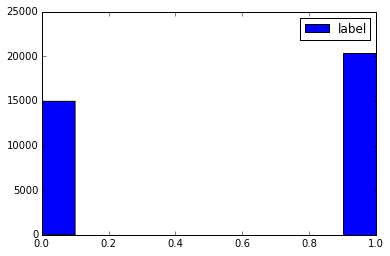

In [7]:
plt.hist(y[:,0], label='label')
plt.legend()
plt.show()

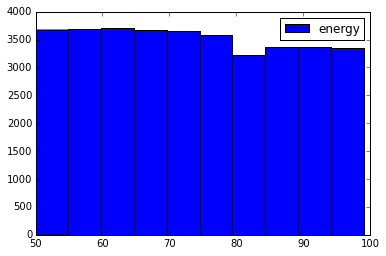

In [8]:
plt.hist(y[:,1], label='energy')
plt.legend()
plt.show()

/usr/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:476: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/usr/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


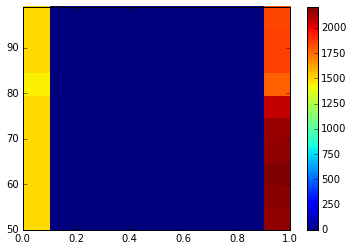

In [9]:
plt.hist2d(y[:,0],y[:,1], label='data')
plt.legend()
plt.colorbar()
plt.show()

In [10]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout
i = Input(shape=(10000,))
d = Dense(1000, activation='sigmoid')(i)
#dp = Dropout(0.5)(d)
oc = Dense(1,activation='sigmoid', name='label')(d)
oe = Dense(1,activation='sigmoid', name='energy')(d)


In [11]:
m_model = Model(input=i, output=[oc,oe])
m_model.compile(loss=['binary_crossentropy','mse'], optimizer='sgd')

In [12]:
m_model.fit( X.reshape(X.shape[0], 10000 ), [y[:,0], y[:,1]/200.] )

Epoch 1/10
35270/35270 [==============================] - 5s - loss: 0.3690 - label_loss: 0.3659 - energy_loss: 0.0030     
Epoch 2/10
35270/35270 [==============================] - 5s - loss: 0.2887 - label_loss: 0.2873 - energy_loss: 0.0013     
Epoch 3/10
35270/35270 [==============================] - 5s - loss: 0.2621 - label_loss: 0.2610 - energy_loss: 0.0011     
Epoch 4/10
35270/35270 [==============================] - 5s - loss: 0.2489 - label_loss: 0.2479 - energy_loss: 9.5186e-04     
Epoch 5/10
35270/35270 [==============================] - 5s - loss: 0.2365 - label_loss: 0.2356 - energy_loss: 8.6689e-04     
Epoch 6/10
35270/35270 [==============================] - 5s - loss: 0.2278 - label_loss: 0.2270 - energy_loss: 8.0620e-04     
Epoch 7/10
35270/35270 [==============================] - 5s - loss: 0.2180 - label_loss: 0.2172 - energy_loss: 7.5737e-04     
Epoch 8/10
35270/35270 [==============================] - 5s - loss: 0.2132 - label_loss: 0.2125 - energy_loss: 7.20

In [13]:
pred = m_model.predict( X.reshape(X.shape[0], 10000 ) )

In [14]:
pred[0]

array([[  4.53380823e-01],
       [  9.04961646e-01],
       [  4.08486962e-01],
       ..., 
       [  1.78879840e-04],
       [  3.73785011e-02],
       [  2.29030848e-02]])

In [15]:
y[:,0]

array([ 1.,  1.,  1., ...,  0.,  0.,  0.])

In [16]:
np.ravel(pred[1])

array([ 0.26409778,  0.25867173,  0.29839766, ...,  0.5209381 ,
        0.50639474,  0.50118017])

In [17]:
y[:,1]/200.

array([ 0.25 ,  0.25 ,  0.25 , ...,  0.495,  0.495,  0.495])

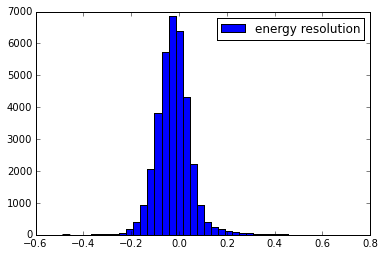

In [18]:
plt.hist( (y[:,1] - np.ravel(pred[1]*200))/y[:,1] , label='energy resolution', bins=40)
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import roc_curve, auc

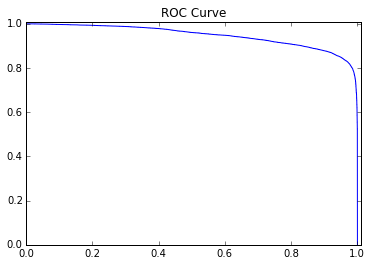

In [20]:
fpr, tpr, _ = roc_curve(np.ravel(y[:,0]),pred[0])
plt.xlim([.0, 1.01])
plt.ylim([.0, 1.01])
plt.title("ROC Curve")
plt.plot( tpr, 1-fpr )
    